In [1]:
# find out how many states are in main data,
# use of aic, bic ect
# same as before but want to compare different samples against each other

In [2]:
import sys
import numpy as np

sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Users/david/Documents/mastersCode/ubm/final/tests/selecting_amount_of_states_hmm', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [3]:
import pickle
from importlib import reload
import numpy as np

In [5]:
# Load state sequence and data from the pickle file
with open('/Users/david/Documents/mastersCode/ubm/final/tests/comparison_of_fe_methods/samples_128_log_power.pickle', 'rb') as file:
    sample_holder = pickle.load(file)

# Access the loaded data
# loaded_ss = loaded_data['state_sequence']
# loaded_data = loaded_data['data']

In [6]:
from final.useful import *

In [7]:
nfft = 128 # 32
unique_labels = np.unique(sample_holder.sample_labels)
# get_log_power_feature()

In [8]:
labels = np.array(sample_holder.sample_labels)
samples = sample_holder.samples
features = sample_holder.features

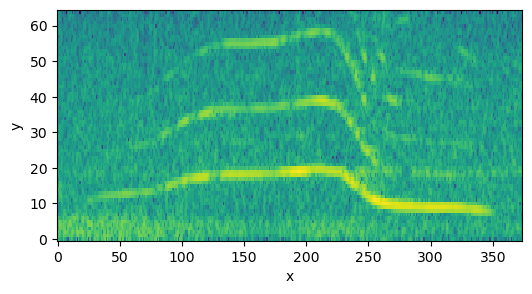

In [9]:
from sklearn.utils import check_random_state
rs = check_random_state(546)
label = 0
indices = np.array(labels == label)
selected_features = [feats for feats, select in zip(features, indices) if select]
vis_helper(selected_features[0])

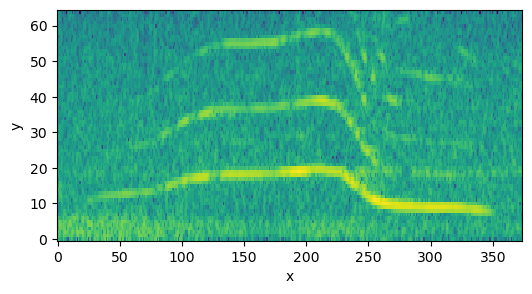

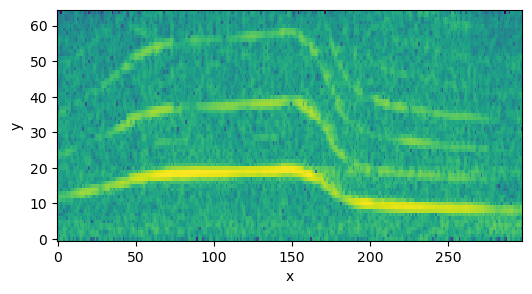

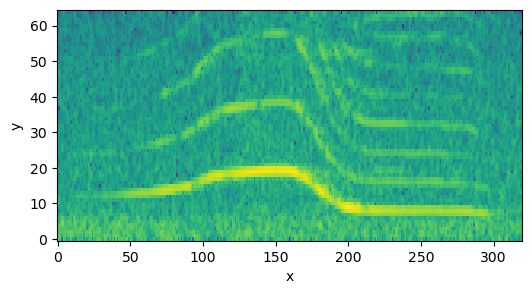

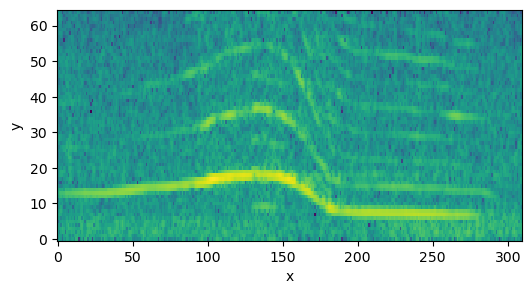

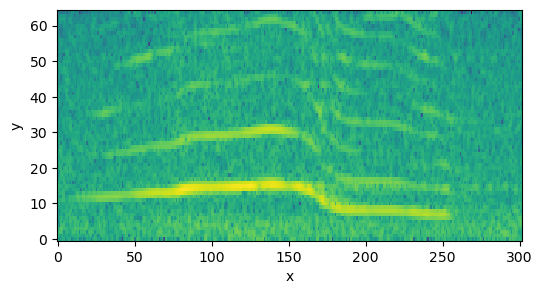

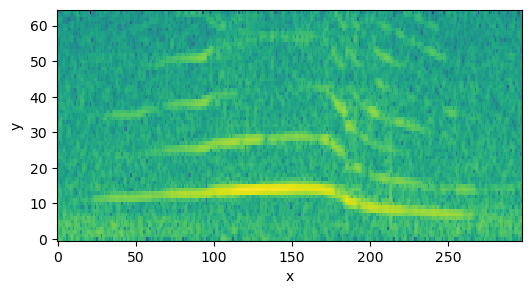

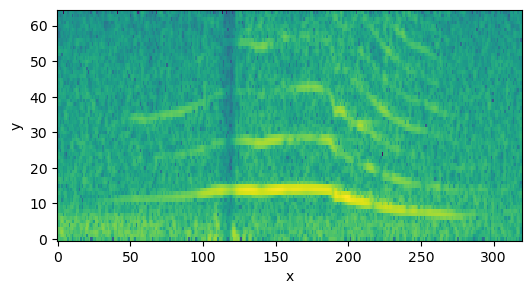

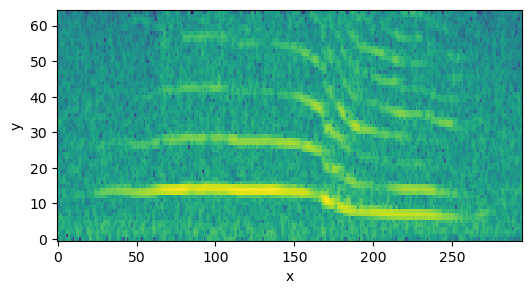

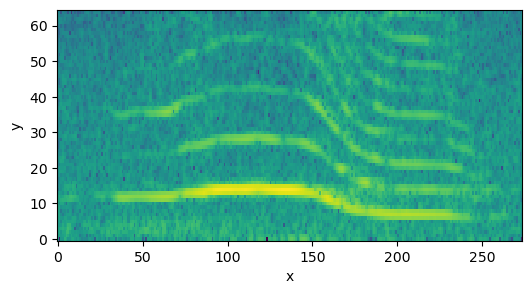

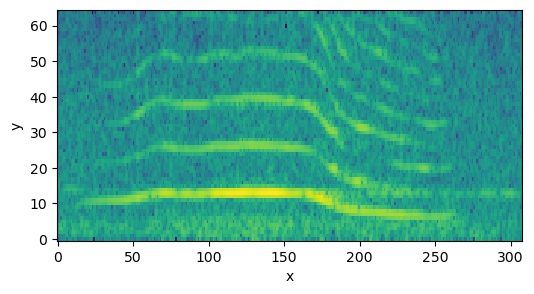

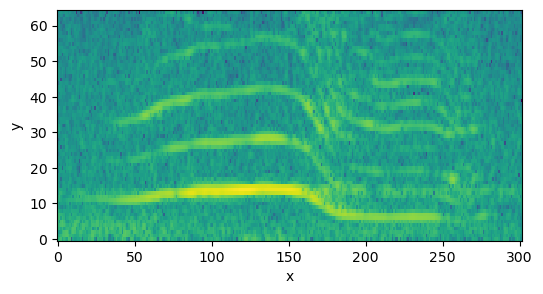

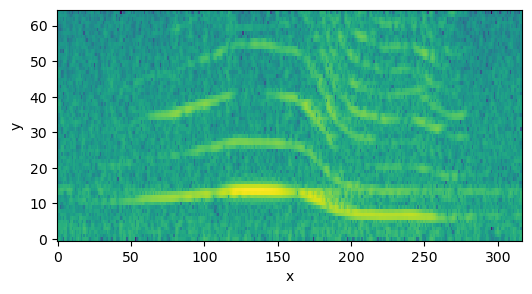

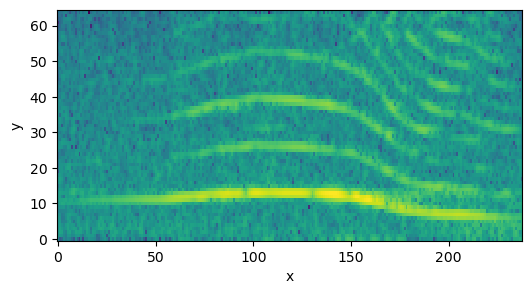

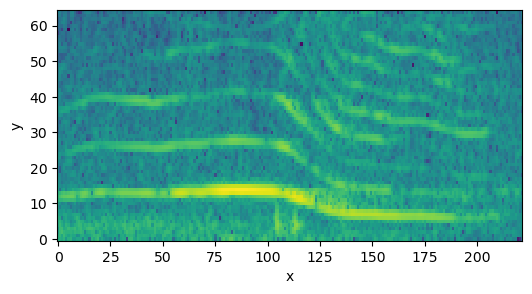

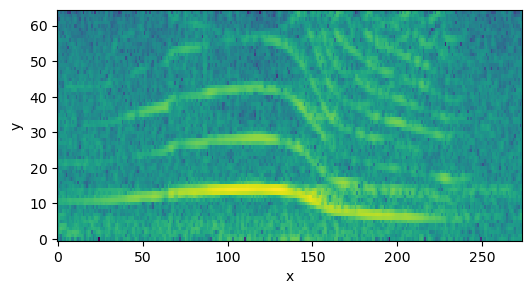

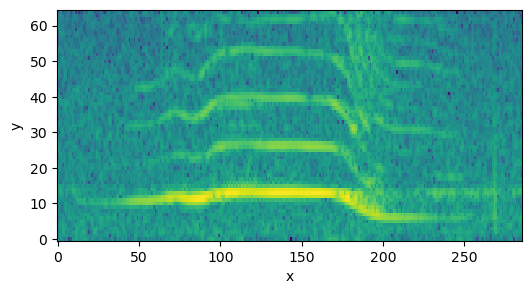

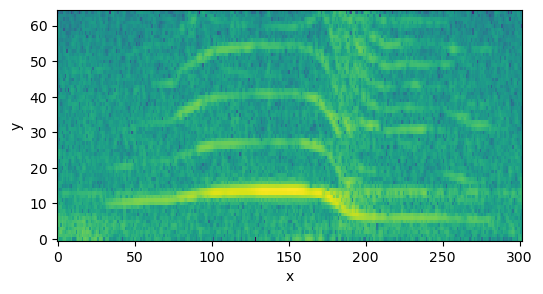

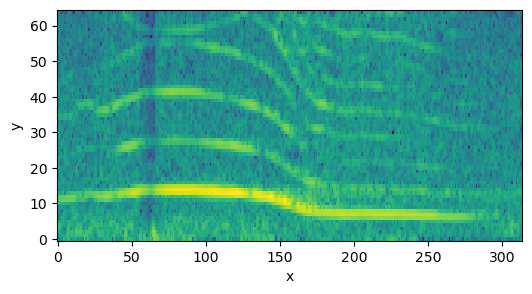

In [10]:
for i in range(len(selected_features)):
    vis_helper(selected_features[i])

In [48]:
def calculate_aic_bic(model, features, lengths):
    log_likelihood = model.score(features, lengths)
    n_params = model.n_features * model.n_components + (model.n_components - 1) * model.n_components
    n_samples = len(features)
    aic = -2 * log_likelihood + 2 * n_params
    bic = -2 * log_likelihood + n_params * np.log(n_samples)
    return aic, bic

In [49]:

lens = []
for feat in selected_features:
    lens.append(len(feat))
lens = np.array(lens)


In [50]:
# feats_to_test = 17
# aic_dct = {}
# bic_dct = {}
# lls_dct = {}
# for z in range(feats_to_test):
# print('testing for feat no: ', z)
current_feat = selected_features
aic = []
bic = []
lls = []
ns = np.arange(2,20)
for n in ns:
    print('training models for: ', n)
    best_ll = None
    best_model = None
    for i in range(2):
        h = GaussianHMM(n, n_iter=200, tol=1e-4, random_state=rs)
        h.fit(np.concatenate(current_feat), lens)
        try:
            score = h.score(np.concatenate(current_feat), lens)
            if not best_ll or best_ll < best_ll:
                best_ll = score
                best_model = h
        except ValueError as e:
            print('training didnt work')
    if best_model is not None:
        aic_n, bic_n = calculate_aic_bic(best_model, np.concatenate(current_feat), lens)
        aic.append(aic_n)
        bic.append(bic_n)
        lls.append(best_model.score(np.concatenate(current_feat), lens))
    else:
        aic.append(np.nan)
        bic.append(np.nan)
        lls.append(np.nan)

        print('completed models for: ', n)
    # aic_dct[z] = aic
    # bic_dct[z] = bic
    # lls_dct[z] = lls

training models for:  2
training models for:  3
training models for:  4
training models for:  5
training models for:  6
training models for:  7
training models for:  8
training models for:  9
training models for:  10
training models for:  11
training models for:  12
training models for:  13
training models for:  14
training models for:  15
training models for:  16
training models for:  17
training models for:  18
training models for:  19


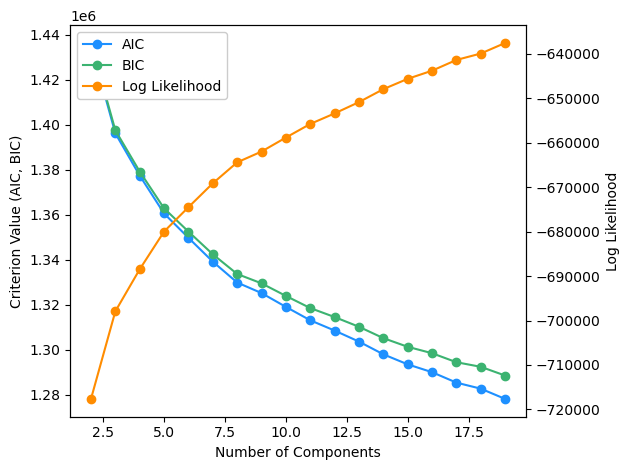

In [51]:
# 0: 12, 1: 17, 2: 15, 3: 13, 4: 13
# for z in range(feats_to_test):
ns = np.arange(2,20)
# aic = aic_dct[z]
# bic = bic_dct[z]
# lls = lls_dct[z]

fig, ax = plt.subplots()
# Plot AIC and BIC on the left y-axis
ln1 = ax.plot(ns, aic, label="AIC", color="dodgerblue", marker="o")
ln2 = ax.plot(ns, bic, label="BIC", color="mediumseagreen", marker="o")

# Create a twin y-axis for Log Likelihood
ax2 = ax.twinx()
ln3 = ax2.plot(ns, lls, label="Log Likelihood", color="darkorange", marker="o")

# Combine legend from both axes
lines = ln1 + ln2 + ln3
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, facecolor='white',loc="upper left", framealpha=1).set_zorder(100)

# Set labels and title
ax.set_ylabel("Criterion Value (AIC, BIC)")
ax2.set_ylabel("Log Likelihood")
ax.set_xlabel("Number of Components")

# Move legend to the right side of the last axis
# all_axes = fig.get_axes()
# for axis in all_axes:
#     legend = axis.get_legend()
#     if legend is not None:
#         legend.remove()
#         all_axes[-1].add_artist(legend)

# Adjust layout
fig.tight_layout()
plt.savefig('humpback_whale_aic.png', bbox_inches='tight')
plt.show()


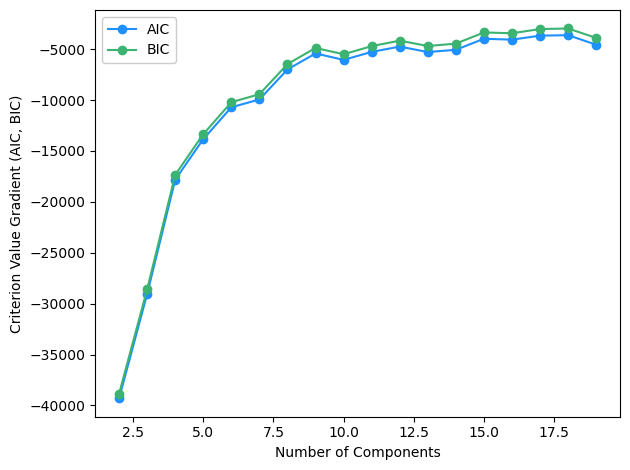

In [52]:
# 0: 12, 1: 17, 2: 15, 3: 13, 4: 13
# for z in range(feats_to_test):
ns = np.arange(2,20)
# aic = aic_dct[z]
# bic = bic_dct[z]
# lls = lls_dct[z]

fig, ax = plt.subplots()
# Plot AIC and BIC on the left y-axis
ln1 = ax.plot(ns, np.gradient(aic), label="AIC", color="dodgerblue", marker="o")
ln2 = ax.plot(ns, np.gradient(bic), label="BIC", color="mediumseagreen", marker="o")

# Create a twin y-axis for Log Likelihood
# ax2 = ax.twinx()
# ln3 = ax2.plot(ns, lls, label="Log Likelihood", color="darkorange", marker="o")

# Combine legend from both axes
lines = ln1 + ln2
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, facecolor='white',loc="upper left", framealpha=1).set_zorder(100)

# Set labels and title
ax.set_ylabel("Criterion Value Gradient (AIC, BIC)")
# ax2.set_ylabel("Log Likelihood")
ax.set_xlabel("Number of Components")

# Move legend to the right side of the last axis
all_axes = fig.get_axes()
for axis in all_axes:
    legend = axis.get_legend()
    if legend is not None:
        legend.remove()
        all_axes[-1].add_artist(legend)

# Adjust layout
fig.tight_layout()
plt.savefig('humpback_whale_aic_delta.png', bbox_inches='tight')
plt.show()

In [53]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

sils=[]
sils_err=[]
iterations=5
from sklearn import metrics
for n in ns:
    print(n)
    tmp_sil=[]
    for _ in range(iterations):
        h = GaussianHMM(n, n_iter=200, tol=1e-4, random_state=rs)
        h.fit(np.concatenate(current_feat), lens)
        labels=h.predict(np.concatenate(current_feat), lens)
        sil=metrics.silhouette_score(np.concatenate(current_feat), labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


Text(0, 0.5, 'Score')

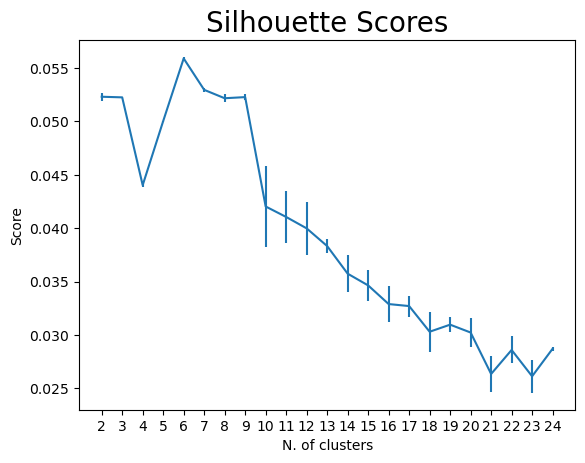

In [54]:
plt.errorbar(ns, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(ns)
plt.xlabel("N. of clusters")
plt.ylabel("Score")